In [ ]:
# https://www.youtube.com/watch?v=ZVKaWPW9oQY

In [1]:
!pip3 install torch==1.9.0+cu102 torchvision==0.10.0+cu102 torchaudio===0.9.0 -f https://download.pytorch.org/whl/torch_stable.html
!pip install easyocr

Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Using cached easyocr-1.4-py3-none-any.whl (63.6 MB)
  Using cached python_bidi-0.4.2-py2.py3-none-any.whl (30 kB)
  Using cached opencv_python-4.5.3.56-cp38-cp38-win_amd64.whl (34.9 MB)


In [17]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [18]:
IMAGE_PATH = "surf.png"

In [19]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(IMAGE_PATH)
result

Using CPU. Note: This module is much faster with a GPU.


C:\Users\Jia Leong\.conda\envs\first\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[84, 338], [416, 338], [416, 394], [84, 394]],
  'THE MORE YOU LEARN',
  0.8656614367870364),
 ([[92, 384], [408, 384], [408, 440], [92, 440]],
  'THE MORE YOU EARN',
  0.6980833672012325),
 ([[336, 434], [468, 434], [468, 466], [336, 466]],
  'Warren Buffet',
  0.9999162824097608),
 ([[18, 518], [235, 518], [235, 557], [18, 557]],
  'Warren Buffett',
  0.9928629821103803)]

In [27]:
first_line = tuple(result[0][0][0])
second_line = tuple(result[0][0][1])
third_line = tuple(result[0][0][2])
fourth_line = tuple(result[0][0][3])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

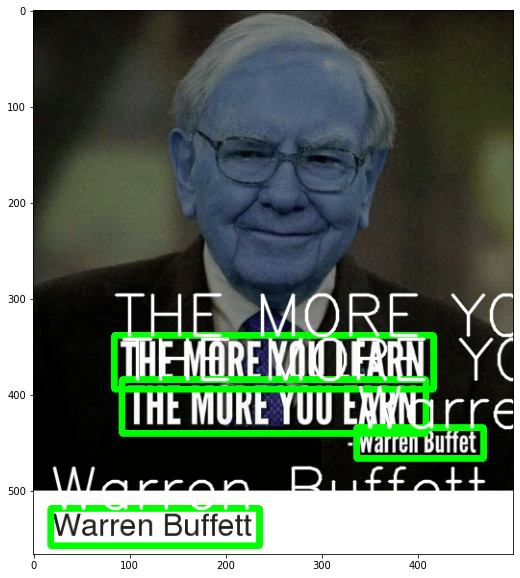

In [45]:
img = cv2.imread(IMAGE_PATH)
for detection in result:
    top_left = tuple((int(val) for val in detection[0][0]))
    bottom_right = tuple((int(val) for val in detection[0][2]))
    text = detection[1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 5)
    img = cv2.putText(img, text, top_left, font, 2, (255,255,255),2, cv2.LINE_AA)
    
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [46]:
result[0]

([[84, 338], [416, 338], [416, 394], [84, 394]],
 'THE MORE YOU LEARN',
 0.8656614367870364)

In [47]:
result[1]

([[92, 384], [408, 384], [408, 440], [92, 440]],
 'THE MORE YOU EARN',
 0.6980833672012325)

In [48]:
result[2]

([[336, 434], [468, 434], [468, 466], [336, 466]],
 'Warren Buffet',
 0.9999162824097608)

In [50]:
result[3]

([[18, 518], [235, 518], [235, 557], [18, 557]],
 'Warren Buffett',
 0.9928629821103803)